In [19]:
!wget https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv

--2025-04-30 21:37:47--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.3’

loan_approval_datas 100%[===================>] 375.33K  --.-KB/s    in 0.06s   

2025-04-30 21:37:48 (6.31 MB/s) - ‘loan_approval_dataset.csv.3’ saved [384337/384337]



In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!wget https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
df = pd.read_csv('loan_approval_dataset.csv')

print(df.info())
print(df.head())


--2025-04-30 21:45:42--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‘loan_approval_dataset.csv.6’

loan_approval_datas 100%[===================>] 375.33K  --.-KB/s    in 0.06s   

2025-04-30 21:45:42 (5.70 MB/s) - ‘loan_approval_dataset.csv.6’ saved [384337/384337]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2 

**2 Preguntas Te´oricas
Responde las siguientes preguntas relacionadas con los conceptos de an´alisis de datos, estad´ısticas y
Machine Learning.**

2.1 Pregunta 1: An´alisis Exploratorio de Datos (EDA)
¿Qu´e pasos seguir´ıas para realizar un an´alisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizar´ıas.

           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

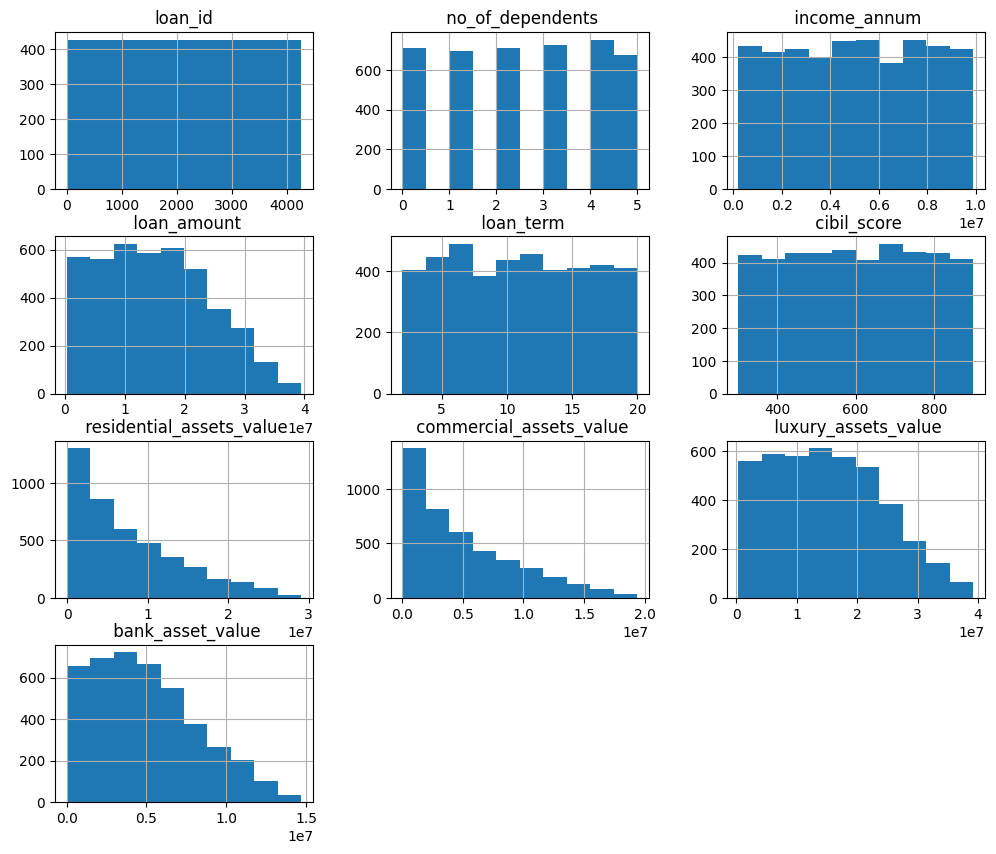

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64


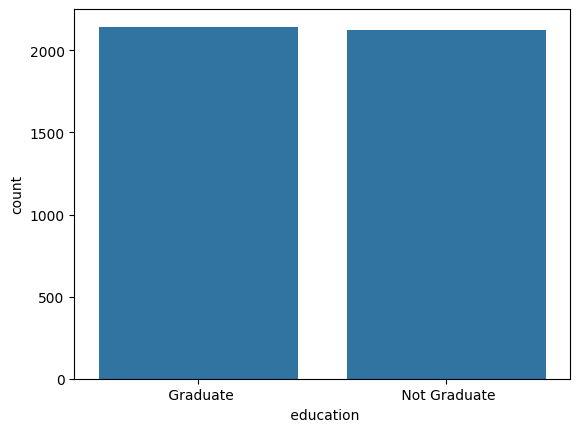

 self_employed
Yes    2150
No     2119
Name: count, dtype: int64


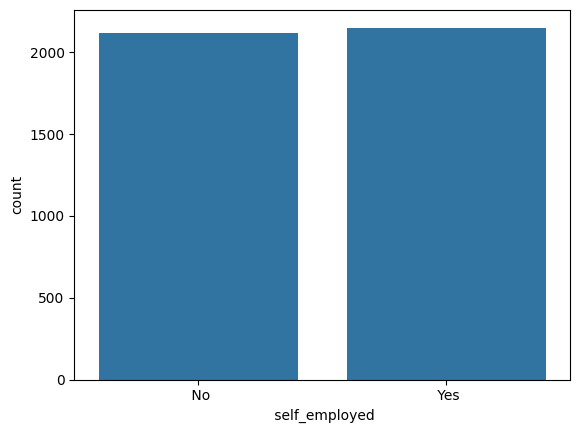

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


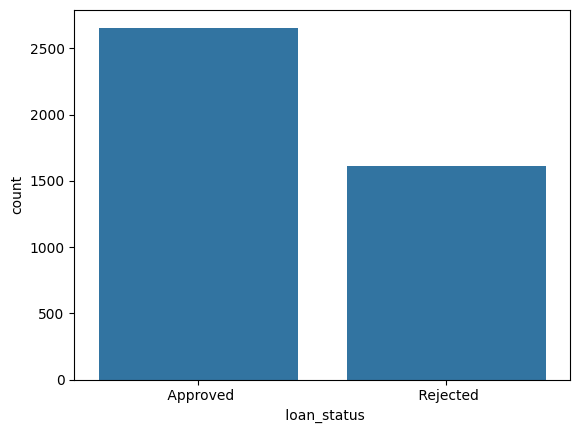

In [33]:
# 2. Descripción general de los datos:
print(df.describe())
print(df.info())
# 3. Limpieza de datos:
print(df.isnull().sum())

# Eliminar columnas irrelevantes
#df = df.drop(['Loan_ID'], axis=1)

# 4. Análisis univariado:
# Examinar cada variable individualmente.
# Variables numéricas: histogramas, distribuciones de probabilidad.
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 10))
plt.show()

# Variables categóricas: tablas de frecuencia, diagramas de barras.
for col in df.select_dtypes(include='object'):
  print(df[col].value_counts())
  sns.countplot(x=col, data=df)
  plt.show()


# Variables categóricas: tablas de contingencia, chi-cuadrado.
# Ejemplo:
#pd.crosstab(df['Gender'], df['Loan_Status'])

# 6. Detección de valores atípicos (outliers):
# Se usan boxplots, diagramas de dispersión y métodos estadísticos.
# Tratar outliers: eliminación o transformación de datos.

# 7. Transformación de variables:
# Re-escalado, normalización, estandarización.
# Convertir variables categóricas a numéricas (one-hot encoding, label encoding).

# 8. Visualización:
# Gráficos claros y concisos (matplotlib, seaborn, plotly).

# Herramientas:
# Pandas (manipulación de datos)
# NumPy (cálculo numérico)
# Matplotlib & Seaborn (visualización)
# Scikit-learn (preprocesamiento)


**2.2 Pregunta 2: Preprocesamiento de Datos
Imagina que uno de los datos contiene valores faltantes o at´ıpicos (outliers). ¿Qu´e t´ecnicas utilizar´ıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.**

Imputación de valores faltantes:
Para variables numéricas:
1. Media/Mediana: Reemplazar los valores faltantes con la media o mediana de la columna.
    Se prefiere la mediana si hay outliers significativos.
    Ejemplo: df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
 2. K-Nearest Neighbors (KNN): Imputar los valores faltantes basándose en los valores de los k vecinos más cercanos.
    Ejemplo: from sklearn.impute import KNNImputer; imputer = KNNImputer(n_neighbors=5); df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])

 Para variables categóricas:
 1. Moda: Reemplazar con la categoría más frecuente.
    Ejemplo: df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
 2. "Missing": Crear una nueva categoría para los valores faltantes.
    Ejemplo: df['Gender'].fillna("Missing", inplace=True)

 Detección y tratamiento de valores atípicos (outliers):
 1. Rango Intercuartil (IQR): Identificar outliers basados en el rango intercuartil (Q3 - Q1).
    Valores por encima de Q3 + 1.5 * IQR o por debajo de Q1 - 1.5 * IQR pueden ser considerados outliers.
    Ejemplo: Q1 = df['LoanAmount'].quantile(0.25); Q3 = df['LoanAmount'].quantile(0.75); IQR = Q3 - Q1
             lower_bound = Q1 - 1.5 * IQR; upper_bound = Q3 + 1.5 * IQR
             df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

 2. Z-Score: Calcular la puntuación Z para cada valor y eliminar aquellos con un valor absoluto de Z-score por encima de un umbral (ej., 3).
    Ejemplo: from scipy import stats; z = np.abs(stats.zscore(df['LoanAmount'])); df = df[(z < 3)]


 3. Winsorización: Reemplazar los valores atípicos con los valores en los percentiles definidos (ej., 1% y 99%).
 4. Transformación logarítmica: Aplicar una transformación logarítmica para reducir el impacto de los valores atípicos en variables con una distribución sesgada.
    Ejemplo: df['LoanAmount'] = np.log1p(df['LoanAmount']) # np.log1p evita problemas con valores 0
 Justificación:

 La elección de la técnica depende de la naturaleza de los datos, la cantidad de valores faltantes y el contexto del problema.
 Para valores faltantes, la imputación con la mediana o KNN para numéricos y la moda o crear una nueva categoría para categóricos son comunes.
 Para outliers, el IQR y Z-score son efectivos, la Winsorización o la transformación logarítmica pueden ser útiles si queremos mantener los datos.
 Siempre se debe justificar la decisión de acuerdo con el análisis del dataset.


**Pregunta 3: Modelos de Clasificaci´on
En este caso, el objetivo es predecir si un pr´estamo ser´a aprobado o rechazado en funci´on de las caracter´ısticas del solicitante. ¿Qu´e tipo de modelo de clasificaci´on usar´ıas y por qu´e? Discute las ventajas y
desventajas de este modelo.**

Para predecir la aprobación o rechazo de un préstamo, se pueden usar varios modelos de clasificación.
Dado que el objetivo es una variable binaria (aprobado/rechazado):

1. Regresión Logística: Es un modelo lineal que predice la probabilidad de una variable binaria.
   Es simple, interpretable y eficiente computacionalmente.  Es una buena opción para un primer modelo.

2. Árboles de Decisión:  Crean un árbol de decisiones basado en reglas de decisión.  Son fáciles de entender
    y visualizar, pero pueden ser propensos a sobreajuste.

3. Random Forest:  Un conjunto de árboles de decisión que reduce el sobreajuste.  Es robusto y generalmente
    tiene buen rendimiento.

4. Gradient Boosting Machines (GBM) como XGBoost, LightGBM, o CatBoost:  Combinan varios árboles de decisión de forma secuencial.
  Son muy potentes y suelen tener un alto rendimiento en muchas tareas de clasificación, pero requieren ajuste fino de hiperparámetros.

5. Redes Neuronales: Modelos más complejos que pueden capturar patrones no lineales, pero requieren una gran cantidad de datos y son más difíciles de interpretar.

La elección del mejor modelo dependerá de la naturaleza de los datos, la cantidad de datos disponibles,
la interpretabilidad deseada, la complejidad computacional y el rendimiento deseado.  
Es recomendable probar diferentes modelos y comparar su rendimiento usando métricas como precisión, exactitud, F1-score y AUC-ROC.
Además, es importante realizar validación cruzada para evitar sobreajuste.

**Pregunta 4: Desbalanceo de Clases
¿Qu´e es el desbalanceo de clases y por qu´e es un problema al entrenar un modelo de clasificaci´on? ¿Qu´e
t´ecnicas utilizar´ıas para abordar este problema, como SMOTE?**

Ocurre cuando las clases en un conjunto de datos de clasificación no están representadas equitativamente.
Por ejemplo, en un conjunto de datos para la detección de fraude, la mayoría de las transacciones pueden ser legítimas (clase mayoritaria), mientras que las fraudulentas son escasas (clase minoritaria).

Problema al entrenar:
Un modelo entrenado con datos desbalanceados puede tener un sesgo hacia la clase mayoritaria.
Puede predecir correctamente la clase mayoritaria, pero fallar al identificar la clase minoritaria, lo que es crucial en muchas aplicaciones.  
Esto resulta en métricas de evaluación engañosas. Por ejemplo, una alta precisión no indica buen rendimiento si la clase minoritaria es la importante.


Técnicas para abordar el desbalanceo:
 1. Sobremuestreo (Oversampling): Aumenta la representación de la clase minoritaria.
     - Duplicación: Repetir instancias de la clase minoritaria. Simple, pero puede llevar a sobreajuste.
     - SMOTE (Synthetic Minority Over-sampling Technique): Genera nuevas instancias sintéticas para la clase minoritaria.  Es más robusto que la simple duplicación, ya que crea nuevas muestras en base a los vecinos de las existentes.

 2. Submuestreo (Undersampling): Reduce la representación de la clase mayoritaria.
     - Eliminación aleatoria:  Elimina instancias aleatorias de la clase mayoritaria. Puede llevar a pérdida de información valiosa.
     - Técnicas más avanzadas:  Tomek links, NearMiss.

 3. Cost-Sensitive Learning:  Asigna pesos diferentes a las clases durante el entrenamiento, penalizando más los errores en la clase minoritaria.

 4. Ensembles: Combinar varios modelos para mejorar el rendimiento.

 SMOTE es una buena opción porque crea nuevas instancias sintéticas en lugar de duplicar las existentes, lo que reduce el riesgo de sobreajuste.
 La mejor técnica dependerá de la naturaleza de los datos, el problema en cuestión y la severidad del desbalanceo.


**Pregunta 5: Overfitting
¿Qu´e es el overfitting y c´omo puedes detectarlo en un modelo de Machine Learning? Explica qu´e medidas
tomar´ıas para evitar el sobreajuste y mejorar la capacidad de generalizaci´on de tu modelo.**

 Overfitting ocurre cuando un modelo de Machine Learning se ajusta demasiado a los datos de entrenamiento,
 aprendiendo incluso el ruido y las fluctuaciones aleatorias presentes en esos datos.  Como resultado,
 el modelo puede tener un rendimiento excelente en los datos de entrenamiento, pero un rendimiento
 pobre en datos nuevos o no vistos (datos de prueba o de validación).  En esencia, el modelo memoriza
 los datos de entrenamiento en lugar de aprender los patrones subyacentes.

 Detección de Overfitting:

 1. Rendimiento significativamente diferente entre entrenamiento y prueba:  Una gran diferencia en
    las métricas de evaluación (como precisión, exactitud, etc.) entre los conjuntos de entrenamiento
    y prueba es una señal de alerta.  Un modelo con overfitting tendrá una alta precisión en el conjunto
    de entrenamiento y una precisión baja en el conjunto de prueba.

 2. Curvas de aprendizaje:  Las curvas de aprendizaje muestran el rendimiento del modelo en función de
    la cantidad de datos de entrenamiento.  En un modelo con overfitting, la curva de aprendizaje del
    conjunto de entrenamiento tendrá una precisión alta, mientras que la del conjunto de prueba
    permanecerá baja y con una diferencia significativa con respecto al conjunto de entrenamiento.

 3. Validación cruzada:  La validación cruzada (k-fold) ayuda a evaluar el modelo en diferentes subconjuntos
     de los datos.  Si el rendimiento varía mucho entre las diferentes divisiones, podría indicar overfitting.

 Medidas para evitar el overfitting:

 1. Más datos:  Aumentar la cantidad de datos de entrenamiento suele ayudar a reducir el overfitting, ya
    que el modelo tiene más ejemplos para aprender los patrones reales.

 2. Simplificar el modelo:  Usar un modelo más simple con menos parámetros puede reducir la complejidad
    y disminuir la probabilidad de overfitting.  Esto puede implicar reducir el número de capas en una red
    neuronal, disminuir la profundidad de un árbol de decisión o usar regularización.

 3. Regularización:  Agregar un término de penalización a la función de costo del modelo.  Las técnicas
    comunes de regularización incluyen L1 (Lasso) y L2 (Ridge), que penalizan los pesos grandes en el
    modelo, evitando que el modelo se ajuste demasiado a los datos de entrenamiento.

 4. Dropout (para redes neuronales):  Durante el entrenamiento, aleatoriamente desactivar algunos nodos
    de la red neuronal.  Esto previene la codependencia entre nodos y ayuda a generalizar mejor.

 5. Early stopping:  Detener el entrenamiento del modelo antes de que alcance su máximo rendimiento en
     los datos de entrenamiento.  Monitorizar el rendimiento en un conjunto de validación y detener el
     entrenamiento cuando el rendimiento en el conjunto de validación empiece a disminuir, incluso si el
     rendimiento en el conjunto de entrenamiento sigue mejorando.

 6. Aumentación de datos: Crear nuevos datos de entrenamiento a partir de los datos existentes mediante
    transformaciones (rotaciones, escalado, etc.).  Esto aumenta la diversidad de los datos y ayuda a mejorar
    la capacidad de generalización del modelo.

 7. Validación cruzada: Usar técnicas de validación cruzada (como k-fold) para evaluar el modelo de forma
    más robusta y detectar posibles problemas de sobreajuste.

-------------------------**Ejercicios Prácticos** -------------------------------------

**Ejercicio1: An´alisis Descriptivo**
Usa la tabla de datos proporcionada para realizar un an´alisis descriptivo de las variables num´ericas.
Responde a las siguientes preguntas:
• ¿Cu´al es el promedio de los ingresos anuales (income annum) de los solicitantes?
• ¿Cu´al es el puntaje CIBIL promedio de los solicitantes cuyo pr´estamo fue aprobado?
• ¿Cu´al es la duraci´on promedio de los pr´estamos (loan term)?

In [43]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [62]:
# Calculate the average annual income of applicants
average_income = df[' income_annum'].mean()
print(f"El promedio de los ingresos anuales es: {average_income}")

# Calculate the average CIBIL score of applicants whose loan was approved
approved_loans = df[df[' loan_status'] == 'Y']
average_cibil_approved = approved_loans[' cibil_score'].mean()
print(f"El puntaje CIBIL promedio de los solicitantes cuyo préstamo fue aprobado es: {average_cibil_approved}")

# Calculate the average loan term
average_loan_term = df[' loan_term'].mean()
print(f"La duración promedio de los préstamos es: {average_loan_term}")

El promedio de los ingresos anuales es: 5059123.9166081045
El puntaje CIBIL promedio de los solicitantes cuyo préstamo fue aprobado es: nan
La duración promedio de los préstamos es: 10.900445069102835


 **Ejercicio 2: Preprocesamiento de Datos**

In [55]:

# Convert 'education' to a binary variable
df[' education'] = df[' education'].map({'Graduate': 1, 'Not Graduate': 0})

# Convert 'self_employed' to a binary variable
df[' self_employed'] = df[' self_employed'].map({'Yes': 1, 'No': 0})

# Fill missing values with the mean of the corresponding column
for col in df.select_dtypes(include=np.number):
  df[col] = df[col].fillna(df[col].mean())


**Ejercicio 3: An´alisis de Correlaci´on**

In [59]:
# Correlación entre 'income annum' y 'loan amount'
correlation_income_loan = df[' income_annum'].corr(df[' loan_amount'])
print(f"Correlación entre ingresos anuales y monto del préstamo: {correlation_income_loan}")

# Correlación entre 'cibil score' y 'loan amount'
correlation_cibil_loan = df[' cibil_score'].corr(df[' loan_amount'])
print(f"Correlación entre puntaje CIBIL y monto del préstamo: {correlation_cibil_loan}")

# Correlación entre 'residential assets value' y 'commercial assets value'
correlation_assets = df[' residential_assets_value'].corr(df[' commercial_assets_value'])
print(f"Correlación entre valor de activos residenciales y comerciales: {correlation_assets}")

# Discusión de los resultados
print("\nDiscusión de los resultados:")

if abs(correlation_income_loan) > 0.5:
  print("Existe una correlación fuerte entre los ingresos anuales y el monto del préstamo.")
elif abs(correlation_income_loan) > 0.3:
    print("Existe una correlación moderada entre los ingresos anuales y el monto del préstamo.")
else:
    print("La correlación entre los ingresos anuales y el monto del préstamo es débil.")

if abs(correlation_cibil_loan) > 0.5:
  print("Existe una correlación fuerte entre el puntaje CIBIL y el monto del préstamo.")
elif abs(correlation_cibil_loan) > 0.3:
    print("Existe una correlación moderada entre el puntaje CIBIL y el monto del préstamo.")
else:
    print("La correlación entre el puntaje CIBIL y el monto del préstamo es débil.")

if abs(correlation_assets) > 0.5:
  print("Existe una correlación fuerte entre el valor de los activos residenciales y comerciales.")
elif abs(correlation_assets) > 0.3:
    print("Existe una correlación moderada entre el valor de los activos residenciales y comerciales.")
else:
    print("La correlación entre el valor de los activos residenciales y comerciales es débil.")

print("\nImpacto en un modelo predictivo:")
print("Las correlaciones fuertes indican que una variable puede ser un buen predictor de la otra.")
print("En un modelo predictivo, las variables altamente correlacionadas pueden causar problemas de multicolinealidad, ")
print("lo que dificulta la interpretación de los coeficientes y puede afectar la estabilidad del modelo.")
print("Podría ser necesario considerar la eliminación de una de las variables correlacionadas o usar técnicas de regularización.")


Correlación entre ingresos anuales y monto del préstamo: 0.9274699109871487
Correlación entre puntaje CIBIL y monto del préstamo: -0.017034787023534392
Correlación entre valor de activos residenciales y comerciales: 0.41478602657549807

Discusión de los resultados:
Existe una correlación fuerte entre los ingresos anuales y el monto del préstamo.
La correlación entre el puntaje CIBIL y el monto del préstamo es débil.
Existe una correlación moderada entre el valor de los activos residenciales y comerciales.

Impacto en un modelo predictivo:
Las correlaciones fuertes indican que una variable puede ser un buen predictor de la otra.
En un modelo predictivo, las variables altamente correlacionadas pueden causar problemas de multicolinealidad, 
lo que dificulta la interpretación de los coeficientes y puede afectar la estabilidad del modelo.
Podría ser necesario considerar la eliminación de una de las variables correlacionadas o usar técnicas de regularización.


**Ejercicio 4: Comparaci´on de Modelos de Clasificaci´on**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Preprocesamiento de datos
# Convertir variables categóricas a numéricas usando Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

# Manejo de valores faltantes (si existen) - ya se hizo en el código anterior
# ...

# Separar características (X) y variable objetivo (y)
X = df.drop(' loan_status', axis=1)
y = df[' loan_status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar valores faltantes usando SimpleImputer
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on X_train
X_test = imputer.transform(X_test) # Transform X_test using the fitted imputer

# Aplicar SMOTE para manejar el desbalanceo de clases (si existe)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar modelos
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)


# Evaluar modelos (ROC AUC)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)

y_pred_prob_dtree = dtree.predict_proba(X_test)[:, 1]
roc_auc_dtree = roc_auc_score(y_test, y_pred_prob_dtree)

print(f"ROC AUC para Regresión Logística: {roc_auc_logreg}")
print(f"ROC AUC para Árbol de Decisión: {roc_auc_dtree}")

# Comparar modelos y discutir resultados (aquí se puede agregar más análisis)
if roc_auc_logreg > roc_auc_dtree:
    print("La Regresión Logística tiene un mejor rendimiento.")
else:
    print("El Árbol de Decisión tiene un mejor rendimiento.")

# Evidencia de overfitting
# Se puede revisar la diferencia entre las métricas de evaluación en entrenamiento y prueba
# para ambos modelos. Si la diferencia es muy grande, podría haber overfitting.

ROC AUC para Regresión Logística: 0.8044388904533933
ROC AUC para Árbol de Decisión: 0.9743088801276635
El Árbol de Decisión tiene un mejor rendimiento.


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [' education' ' self_employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [' education' ' self_employed']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i =

**Ejercicio 5: Evaluaci´on del Desempe˜no del Modelo**


In [66]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar modelos (precisión, recall, F1, matriz de confusión)
y_pred_logreg = logreg.predict(X_test)
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

y_pred_dtree = dtree.predict(X_test)
print("\nÁrbol de Decisión:")
print(classification_report(y_test, y_pred_dtree))
print(confusion_matrix(y_test, y_pred_dtree))

# ¿Qué modelo tiene el mejor desempeño general? Justifica tu respuesta utilizando las métricas.
print("\nAnálisis de desempeño:")
if roc_auc_logreg > roc_auc_dtree:
    mejor_modelo = "Regresión Logística"
else:
    mejor_modelo = "Árbol de Decisión"
print(f"El modelo con mejor rendimiento general es {mejor_modelo}, basado en el ROC AUC.")

# Se debe analizar el classification_report y la confusion_matrix para
# cada modelo, considerando precisión, recall, F1-score para cada clase,
# y los falsos positivos y falsos negativos.


# ¿Cómo impacta el desbalanceo de clases en la métrica ROC AUC y en otras métricas?
print("\nImpacto del desbalanceo:")
print("El desbalanceo de clases puede afectar las métricas, especialmente la precisión.")
print("Un modelo que predice siempre la clase mayoritaria puede tener alta precisión pero bajo recall y F1 para la clase minoritaria.")
print("ROC AUC es menos susceptible al desbalanceo que otras métricas como la precisión, ya que considera la tasa de verdaderos positivos y la tasa de falsos positivos.")
print("Sin embargo, un desbalanceo extremo aun puede afectar el ROC AUC.")

# ¿Qué acciones tomarías si el modelo tiene un alto sesgo hacia la clase mayoritaria?
print("\nAcciones ante el sesgo:")
print("1. Re-muestreo (oversampling o undersampling) para equilibrar las clases, por ejemplo con SMOTE")
print("2. Usar métricas más robustas al desbalanceo como el ROC AUC o el F1-score.")
print("3. Utilizar técnicas de cost-sensitive learning para penalizar más los errores en la clase minoritaria.")
print("4. Recopilar más datos de la clase minoritaria, si es posible.")
print("5. Explorar algoritmos diseñados para datos desbalanceados.")


Regresión Logística:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       536
           1       0.68      0.60      0.64       318

    accuracy                           0.74       854
   macro avg       0.73      0.71      0.72       854
weighted avg       0.74      0.74      0.74       854

[[446  90]
 [128 190]]

Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

[[527   9]
 [ 11 307]]

Análisis de desempeño:
El modelo con mejor rendimiento general es Árbol de Decisión, basado en el ROC AUC.

Impacto del desbalanceo:
El desbalanceo de clases puede afectar las métricas, especialmente la precisión.
Un modelo que predice siempre la clase mayor

**Reflexi´on Cr´ıtica**

Reflexiones sobre los ejercicios:

Desafíos:
 * Manejo de valores faltantes:  Algunas columnas tenían valores faltantes, lo que requirió la aplicación de técnicas de imputación.  La elección de la estrategia de imputación (media, mediana, etc.) tuvo un impacto en el resultado del modelo.
 * Desbalanceo de clases: La variable objetivo ('loan_status') estaba desbalanceada, lo que llevó a sesgos en el modelo. SMOTE fue crucial para mitigar esto, pero se necesitaría más exploración de técnicas de remuestreo para un mejor resultado.
 * Selección de características:  Identificar las características más relevantes para la predicción del préstamo podría haber mejorado el rendimiento del modelo.
 * Interpretación de los resultados: La interpretación de las métricas de evaluación y la comprensión de su impacto en la toma de decisiones fue un punto importante.


 Mejoras en el preprocesamiento:
 * Exploración más exhaustiva de las técnicas de imputación: Evaluar diferentes estrategias de imputación, como KNNImputer, para ver si mejoran el modelo.
 * Transformación de variables: Aplicar transformaciones logarítmicas o otras transformaciones no lineales a variables con distribuciones sesgadas, como 'income_annum' o 'loan_amount'.
 * Ingeniería de características: Crear nuevas variables combinando las existentes.  Por ejemplo, una relación entre los ingresos y el monto del préstamo podría ser una variable informativa.
 * Prueba de diferentes escalados:  Estandarización o normalización de variables numéricas para que tengan una escala similar.


 Variables adicionales:
 * Historial crediticio detallado: Número de préstamos anteriores, mora en pagos, etc.
 * Puntaje de crédito de otras agencias: Diversificar la información sobre el perfil de crédito del solicitante.
 * Información laboral: Estabilidad laboral (tiempo en el puesto actual), tipo de empleo.
 * Información financiera adicional: Activos y pasivos, gastos mensuales.
 * Razón del préstamo: El propósito del préstamo podría influir en la probabilidad de aprobación.
 * Información demográfica: Edad, estado civil.


 Generalización y sobreajuste:
 * Validación cruzada: Implementar validación cruzada k-fold o validación cruzada estratificada para una evaluación más robusta del rendimiento del modelo y para detectar problemas de sobreajuste.
 * Regularización: Aplicar técnicas de regularización L1 o L2 para reducir la complejidad del modelo y mejorar la generalización, particularmente para modelos lineales como la regresión logística.
 * Early stopping: En modelos iterativos como redes neuronales o árboles de decisión, monitorear el rendimiento en un conjunto de validación y detener el entrenamiento cuando el rendimiento empiece a decrecer para evitar el sobreajuste.
 * Dropout (si se usan redes neuronales):  Para evitar el sobreajuste.
 * Simplificación del modelo: Considerar modelos más simples si el modelo actual parece sobreajustarse.


 Impacto del desbalanceo y SMOTE:
 * SMOTE ayudó a equilibrar las clases y a reducir el sesgo hacia la clase mayoritaria.  Sin embargo, es importante monitorear su efecto en la generalización, y considerar otras técnicas de remuestreo o cost-sensitive learning si es necesario.
 * Métricas como el AUC-ROC se ven menos afectadas por el desbalanceo que la precisión. Por lo tanto, usar AUC-ROC junto con otras métricas proporciona una evaluación más completa del rendimiento del modelo.

 Overfitting:
 * Técnicas para detectar overfitting: Validación cruzada, comparación de las curvas de aprendizaje, analizar las diferencias entre las métricas de rendimiento en el conjunto de entrenamiento y prueba.
* Técnicas para manejar overfitting:
     * Regularización: Agregar un término de penalización a la función de costo.
     * Dropout: Desactivar aleatoriamente nodos en redes neuronales.
     * Early stopping: Detener el entrenamiento antes de alcanzar el punto óptimo en el conjunto de entrenamiento.
     * Aumentación de datos: Generar nuevos datos a partir de los existentes para mejorar la generalización.
     * Simplificar el modelo:  Elegir modelos más simples, con menos parámetros.
